In [10]:
# Cell 2: Define line styles, colors, and symbols
import os
import pandas as pd
from itertools import cycle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
line_arr = ('-','--','-.',':')
color_arr = ('k','r','b','m','y','g', 'c')
symbol_arr = ('s','o','v','^','*')

In [11]:
# Cell 3: Define the directory containing the CSV files
dir_path = "../../figs/data/case_CH4_counterflow_premixed/phi1.2"

In [12]:
# Cell 4: Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(dir_path) if f.endswith('.csv')]

In [13]:
# Cell 5: Define the plot_with_labels function
def plot_with_labels(y_column, y_label, save_name):
    # Convert figure size from cm to inches
    fig_width_cm = 12
    fig_height_cm = 20
    fig_width_in = fig_width_cm / 2.54
    fig_height_in = fig_height_cm / 2.54

    # Create a new figure with the desired size
    plt.figure(figsize=(fig_width_in, fig_height_in))

    # Create cycle iterators for the line styles, colors, and markers
    line_cycle = cycle(line_arr)
    color_cycle = cycle(color_arr)
    marker_cycle = cycle(symbol_arr)

    # List to hold data for sorting
    plot_data = []

    # Loop through each CSV file
    for csv_file in csv_files:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(dir_path, csv_file))

        # Sort the DataFrame by the 'strain_rate' column
        df = df.sort_values('strain_rate')

        # Extract the species name from the file name
        species_name = csv_file.split('_')[0]

        # Get the next line style, color, and marker from the cycle iterators
        line_style = next(line_cycle)
        line_color = next(color_cycle)
        marker = next(marker_cycle)

        # Append the data for sorting
        plot_data.append((df, species_name, line_style, line_color, marker))

    # Sort the plot data by the last value of y_column in descending order
    plot_data.sort(key=lambda x: x[0][y_column].iloc[-1], reverse=True)

    # Plot the data
    for df, species_name, line_style, line_color, marker in plot_data:
        plt.plot(df['strain_rate'], df[y_column], label=species_name, linestyle=line_style, color=line_color, marker=marker)

    # Add a legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)

    # Add labels
    plt.xlabel('Strain Rate ($m^{-1}s$)', fontsize=11)
    plt.ylabel(y_label, fontsize=11)

    # Save the figure
    plt.savefig(os.path.join(dir_path, save_name), bbox_inches='tight')

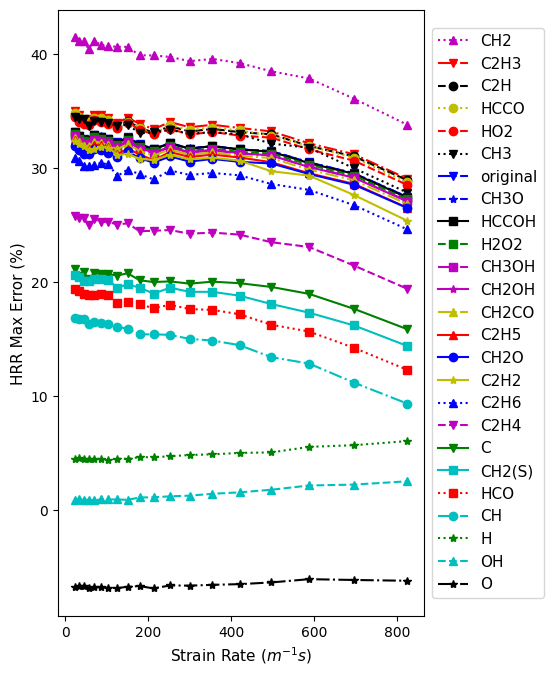

In [14]:
# Cell 6: Plot HRR_error_max against strain_rate
plot_with_labels('HRR_error_max', 'HRR Max Error (%)', 'combined_plot.png')

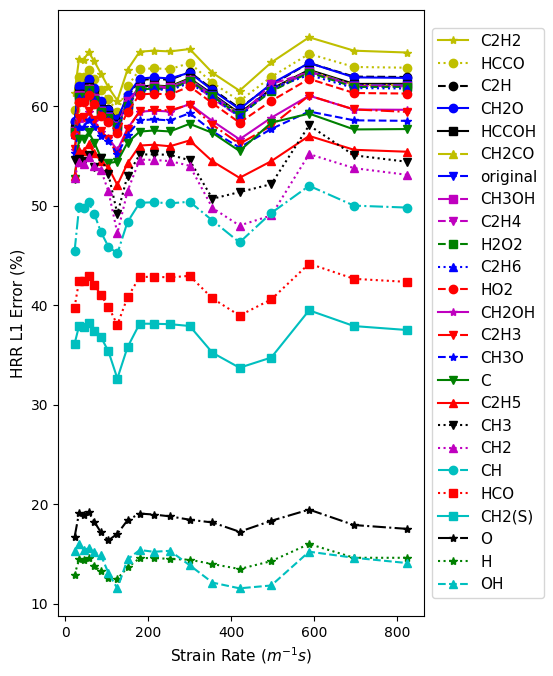

In [15]:
# Cell 7: Plot HRR_error_L1 against strain_rate
plot_with_labels('HRR_error_L1', 'HRR L1 Error (%)', 'combined_plot_L1.png')